## CART (Classification and Regression Tree)

Amaç veri setleri içerisindeki karmaşık yapıları basit karar yapılarına dönüşmektürmektir. Heterojen veri setleri belirlenmiş bir hedef değişkene göre homojen alt gruplara ayrılır.

In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report


df = pd.read_csv('diabetes.csv')
y = df['Outcome'] 
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)

### Model

In [3]:
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier().fit(X_train, y_train)

### Tahmin

In [4]:
y_pred = cart.predict(X_test)
accuracy_score(y_test, y_pred)

0.7012987012987013

### Tuning

In [5]:
cart_params = {'max_depth': [1,3,5,8,10],
              'min_samples_split': [2,3,5,10,20,50]}

In [6]:
cart_cv = GridSearchCV(cart, cart_params, cv=5, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    4.3s finished


In [7]:
cart_cv

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 3, 5, 8, 10],
                         'min_samples_split': [2, 3, 5, 10, 20, 50]},
             verbose=2)

In [8]:
cart_cv.best_params_

{'max_depth': 5, 'min_samples_split': 50}

In [9]:
cart = DecisionTreeClassifier(
    max_depth= cart_cv.best_params_['max_depth'], 
    min_samples_split= cart_cv.best_params_['min_samples_split']).fit(X_train, y_train)

In [10]:
y_pred = cart.predict(X_test)

### Model değerlendirmesi

In [11]:
accuracy_score(y_test, y_pred)

0.7575757575757576

In [12]:
cross_val_score(cart, X_test, y_test, cv=5).mean()

0.6975948196114709

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       151
           1       0.69      0.55      0.61        80

    accuracy                           0.76       231
   macro avg       0.74      0.71      0.72       231
weighted avg       0.75      0.76      0.75       231



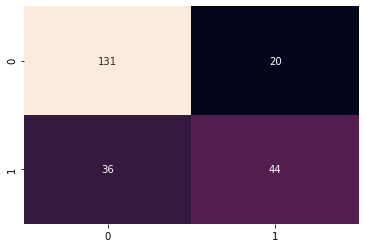

In [14]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cbar=False)
plt.show()

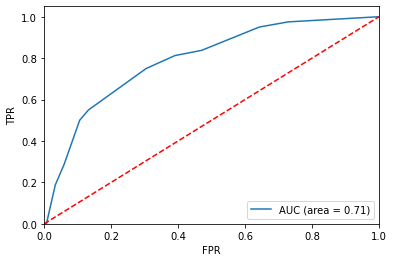

In [15]:
cart_roc_auc = roc_auc_score(y_test, cart.predict(X_test))
fpr , tpr, thresholds = roc_curve(y_test, cart.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % cart_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='lower right')
plt.show()

## Random Forests

Temeli birden çok karar ağacının ürettiği tahminlerin bir araya getirilerek değerlendirilmesine dayanır. 
* Random Forests Bagging(Breiman, 1996) ile Random Subspace(Ho, 1998) yöntemlerinin birleşimi ile oluşmuştur.

Bagging(Bootstrap Aggregating): Temeli bootstrap yöntemi ile oluşan birden fazla karar ağacının ürettiği tahminleri bir araya getirilerek değerlendirilmesine dayanır. Baggiing yöntemi Random Forests algoritmasının özel bir halidir.
Not: Bootstrap Yöntemi, istatistik alanında sıklıkla kullanılan yöntemlerin başında gelmektedir. Bootstrap yöntemleri ya da algoritmalarındaki asıl amaç veriden, büyük veri setleri oluşturmak (üretmek) ve yeniden örnekleme yapmaktır.

Random Subspace: Makine öğreniminde rasgele altuzay yöntemi, bir kümedeki tahmin ediciler arasındaki korelasyonu, özellik kümesi yerine rastgele özellik örnekleri üzerinde eğiterek azaltmaya çalışan bir topluluk öğrenme yöntemidir.

* Ağaçlar için gözlemler bootstrap rastgele örnek seçim yöntemi ile değişkenler random subspace yöntemi ile seçilir.

* Karar ağacının her bir düğümünde en iyi dallara ayırıcı değişiken tüm değişkenler arasından rastgele seçilen daha az sayıdaki değişken arasından seçilir.

* Ağaç oluşturmada veri setinin 2/3'ü kulllanılır. Dışarda kalan veri ağaçların performans değerlendirmesi ve değişken öneminin belirlenmesi için kullanılır.

* Her düğüm noktasında rastgele değişken seçimi yapılır.(sınıflandırma için √p)

* Nihai tahmin için ağaçlardan tahmin değeri talep edilirken her bir ağacın daha önceden hesaplanan hata oranları göz önüne alınarak ağırlık verilir.

### Model

In [16]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier().fit(X_train, y_train)

### Tahmin

In [17]:
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7489177489177489

### Tuning

In [18]:
rf_params = {'n_estimators': [100,200,500,1000],
            'max_features': [3,5,7,8],
            'min_samples_split':[2,5,10,20]}

In [19]:
rf_cv = GridSearchCV(rf, rf_params, cv=5, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:  4.2min finished


In [20]:
rf_cv

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_features': [3, 5, 7, 8],
                         'min_samples_split': [2, 5, 10, 20],
                         'n_estimators': [100, 200, 500, 1000]},
             verbose=2)

In [21]:
rf_cv.best_params_

{'max_features': 3, 'min_samples_split': 2, 'n_estimators': 100}

In [22]:
rf = RandomForestClassifier(
    n_estimators=rf_cv.best_params_['n_estimators'],
    max_features=rf_cv.best_params_['max_features'],
    min_samples_split=rf_cv.best_params_['min_samples_split']).fit(X_train, y_train)

In [23]:
y_pred = rf.predict(X_test)

### Model değerlendirmesi

In [24]:
accuracy_score(y_test, y_pred)

0.7359307359307359

In [25]:
rf.feature_importances_

array([0.07391468, 0.2894101 , 0.0843936 , 0.06020933, 0.06078332,
       0.16773393, 0.11543256, 0.14812247])

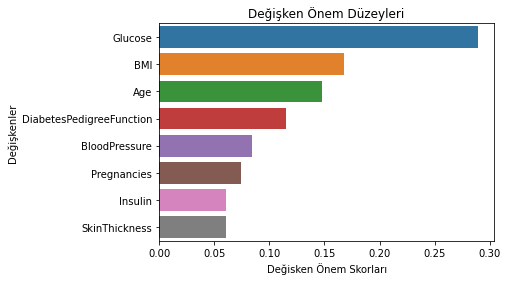

In [26]:
feature_imp = pd.Series(rf.feature_importances_,
                       index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Değisken Önem Skorları')
plt.ylabel('Değişkenler')
plt.title('Değişken Önem Düzeyleri')
plt.show()

In [27]:
cross_val_score(rf, X_test, y_test, cv=5).mean()

0.7364477335800185

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79       151
           1       0.61      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231



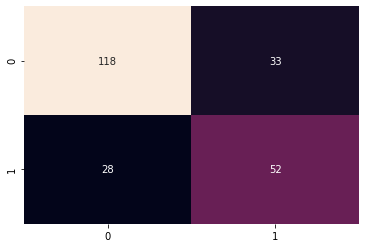

In [29]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cbar=False)
plt.show()

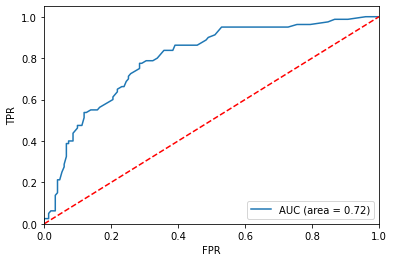

In [30]:
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
fpr , tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % rf_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='lower right')
plt.show()

## Gradient Boosting Machine(GBM)

Gradient boosting: Regresyon ve sınıflandırma problemleri için, genellikle karar ağaçları olan zayıf tahmin modelleri topluluğu şeklinde bir tahmin modeli üreten bir makine öğrenme tekniğidir. Modeli, diğer arttırıcı yöntemlerin yaptığı gibi aşamalı bir şekilde inşa eder ve keyfi farklılaşabilir bir kayıp fonksiyonunun optimizasyonuna izin vererek onları genelleştirir.

* Gradint boosting tek bir tahminsel model formunda olan modeller serisi oluşturur.
* Seri içerisindeki bir model serideki bir önceki modelin tahmin artıklarının/hatalarının üzerine kurularak(fit) oluşturulur.
* GBM diferansiyellenebilen herhangi bir kayıp fonksiyonunu optimize edebilen Gradient Descent algoritmasını kullanır.
* GBM bir çok temel öğrenici tipi(base learner type) kullanabilir.(Trees, linear terms, splines,...)
* Cost fonksiyonları ve link fonksiyonlarını modifiye edebilir.
* GBM = Boosting + Gradient Descent

### Model

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier().fit(X_train, y_train)

### Tahmin

In [32]:
y_pred = gbm.predict(X_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

### Tuning

In [33]:
gbm_params = {'learning_rate': [0.1, 0.01, 0.001, 0.05],
            'n_estimators': [100,200,500,1000],
            'max_depth':[2,3,5,8]}

In [34]:
gbm_cv = GridSearchCV(gbm, gbm_params, cv=5, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done 166 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:  2.6min finished


In [35]:
gbm_cv

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001, 0.05],
                         'max_depth': [2, 3, 5, 8],
                         'n_estimators': [100, 200, 500, 1000]},
             verbose=2)

In [36]:
gbm_cv.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}

In [37]:
gbm = GradientBoostingClassifier(
    learning_rate = gbm_cv.best_params_['learning_rate'],
    n_estimators = gbm_cv.best_params_['n_estimators'],
    max_depth = gbm_cv.best_params_['max_depth']).fit(X_train, y_train)

In [38]:
y_pred = gbm.predict(X_test)

### Model değerlendirmesi

In [39]:
accuracy_score(y_test, y_pred)

0.7402597402597403

In [40]:
gbm.feature_importances_

array([0.03072388, 0.48129227, 0.01541939, 0.01007869, 0.03710728,
       0.19031714, 0.07604172, 0.15901962])

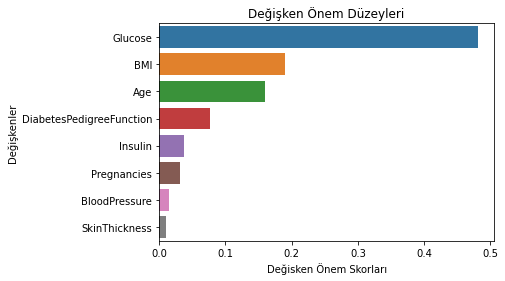

In [41]:
feature_imp = pd.Series(gbm.feature_importances_,
                       index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Değisken Önem Skorları')
plt.ylabel('Değişkenler')
plt.title('Değişken Önem Düzeyleri')
plt.show()

In [42]:
cross_val_score(gbm, X_test, y_test, cv=5).mean()

0.7275670675300647

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       151
           1       0.62      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



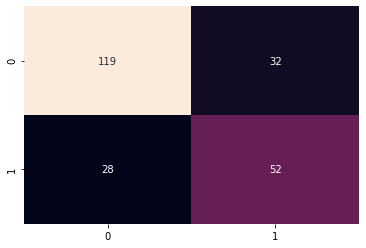

In [44]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cbar=False)
plt.show()

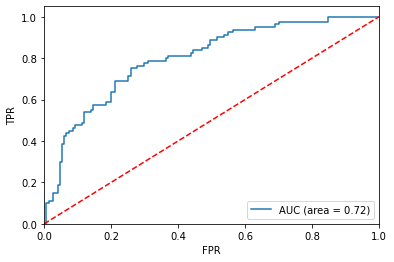

In [45]:
gbm_roc_auc = roc_auc_score(y_test, gbm.predict(X_test))
fpr , tpr, thresholds = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % gbm_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='lower right')
plt.show()

### eXtreme Gradient Boosting (XGBoost)

XGBoost, GBM'in hız ve tahmin performansını arttırmak üzere optimize edilmiş; ölçeklenebilir ve farklı platformlara entegre edilebilir halidir. 2014 yılında Tianqi Chen tarafından geliştirilmiştir.

* R, Python, Hodoop, Scala, Julia ile kullanılabilir.
* Ölçeklenebilir ve hızlıdır.
* Tahmin başarısı yüksektir.


xgboost'u kullanabilmek için xgboost kütühanesini yüklüyoruz.

!pip install xgboost

### Model

In [46]:
from xgboost import XGBClassifier
xgboost = XGBClassifier().fit(X_train, y_train)

[23:15:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


### Tahmin

In [47]:
y_pred = xgboost.predict(X_test)
accuracy_score(y_test, y_pred)

0.7359307359307359

### Tuning

In [48]:
xgboost_params = {'learning_rate': [0.1, 0.01, 0.001],
            'subsample':[0.6, 0.8, 1],
            'n_estimators': [100,500,1000,2000],
            'max_depth':[3,5,7]}

In [ ]:
xgboost_cv = GridSearchCV(xgboost, xgboost_params, cv=5, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.6s


In [ ]:
xgboost_cv

In [ ]:
xgboost_cv.best_params_

In [ ]:
xgboost = XGBClassifier( 
    learning_rate = xgboost_cv.best_params_['learning_rate'],
    max_depth = xgboost_cv.best_params_['max_depth'],
    n_estimators = xgboost_cv.best_params_['n_estimators']).fit(X_train, y_train)

In [ ]:
y_pred = xgboost.predict(X_test)

### Model değerlendirmesi

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
xgboost.feature_importances_

In [ ]:
feature_imp = pd.Series(xgboost.feature_importances_,
                       index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Değisken Önem Skorları')
plt.ylabel('Değişkenler')
plt.title('Değişken Önem Düzeyleri')
plt.show()

In [ ]:
cross_val_score(xgboost, X_test, y_test, cv=5).mean()

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cbar=False)
plt.show()

In [ ]:
xgboost_roc_auc = roc_auc_score(y_test, xgboost.predict(X_test))
fpr , tpr, thresholds = roc_curve(y_test, xgboost.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % xgboost_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='lower right')
plt.show()

### LightGBM

LightGBM, XGBoost'un eğitim süresi performansını arttırmaya yönelik geliştirilen GBM türüdür. 2017 yılında Microsoft tarafından geliştirilmiştir.

* Performansı yüksektir.
* Level-wise büyüme stratejisi yerine Leaf-wise büyüme stratejisi kullanır.
* BFS yerine DFS kullanır


LightGBM' i kullanabilmek için lightgbm kütühanesini yüklüyoruz.

!pip install lightgbm

### Model

In [ ]:
from lightgbm import LGBMClassifier
lightgbm = LGBMClassifier().fit(X_train, y_train)

### Tahmin

In [ ]:
y_pred = lightgbm.predict(X_test)
accuracy_score(y_test, y_pred)

### Tuning

In [ ]:
lightgbm_params = {'learning_rate': [0.1, 0.01, 0.001],
            'n_estimators': [200,500,100],
            'max_depth':[1,2,35,8]}

In [ ]:
lightgbm_cv = GridSearchCV(lightgbm, lightgbm_params, cv=5, n_jobs=-1, verbose=2).fit(X_train, y_train)

In [ ]:
lightgbm_cv

In [ ]:
lightgbm_cv.best_params_

In [ ]:
lightgbm = LGBMClassifier(    
    learning_rate = lgbm_cv.best_params_['learning_rate'],
    n_estimators = lgbm_cv.best_params_['n_estimators'],
    max_depth = lgbm_cv.best_params_['max_depth']).fit(X_train, y_train)

In [ ]:
y_pred = lightgbm.predict(X_test)

### Model değerlendirmesi

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
lightgbm.feature_importances_

In [ ]:
feature_imp = pd.Series(lightgbm.feature_importances_,
                       index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Değisken Önem Skorları')
plt.ylabel('Değişkenler')
plt.title('Değişken Önem Düzeyleri')
plt.show()

In [ ]:
cross_val_score(lightgbm, X_test, y_test, cv=5).mean()

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cbar=False)
plt.show()

In [ ]:
lightgbm_roc_auc = roc_auc_score(y_test, lightgbm.predict(X_test))
fpr , tpr, thresholds = roc_curve(y_test, lightgbm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % lightgbm_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='lower right')
plt.show()

### Category Boosting (CatBoost)

Kategorik değişkenler ile otomatik olarak mücadele edebilen, hızlı, başarılı GBM türüdür. 2017 yılında Yandex tarafınfan geliştirilmiştir.

* Kategorik değişken desteği.
* Hızlı ve ölçeklenebilir GPU desteği.
* Daha başarılı tahminler.
* Hızlı eğitim ve hızlı tahmin.


CatBoost'u kullanabilmek için xgboost kütühanesini yüklüyoruz.

!pip install catboost

### Model

In [ ]:
from catboost import CatBoostClassifier
catboost = CatBoostClassifier().fit(X_train, y_train, verbose=False)

### Tahmin

In [ ]:
y_pred = catboost.predict(X_test)
accuracy_score(y_test, y_pred)

### Tuning

In [ ]:
catboost_params = {'learning_rate': [0.1, 0.01, 0.003],
            'iterations': [200,500,1000],
            'depth':[4,5,8]}

In [ ]:
catboost_cv = GridSearchCV(catboost, catboost_params, cv=5, n_jobs=-1, verbose=2).fit(X_train, y_train, verbose=False)

In [ ]:
catboost_cv

In [ ]:
catboost_cv.best_params_

In [ ]:
catboost = CatBoostClassifier(
    learning_rate = catboost_cv.best_params_['learning_rate'],
    iterations = catboost_cv.best_params_['iterations'],
    depth = catboost_cv.best_params_['depth']).fit(X_train, y_train, verbose=False)

In [ ]:
y_pred = catboost.predict(X_test)

### Model değerlendirmesi

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
catboost.feature_importances_

In [ ]:
feature_imp = pd.Series(catboost.feature_importances_,
                       index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Değisken Önem Skorları')
plt.ylabel('Değişkenler')
plt.title('Değişken Önem Düzeyleri')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cbar=False)
plt.show()

In [ ]:
catboost_roc_auc = roc_auc_score(y_test, catboost.predict(X_test))
fpr , tpr, thresholds = roc_curve(y_test, catboost.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % catboost_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='lower right')
plt.show()

## Tüm Modellerin Karşılaştırılması

In [ ]:
models = [cart, rf, gbm, xgboost, lightgbm, catboost]
result = []
results = pd.DataFrame(columns=['Models', "Accuracy"])

for model in models:
    names = model.__class__.__name__
    print(names)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    result = pd.DataFrame([[names, acc*100]], columns=['Models', 'Accuracy'])
    results = results.append(result)

In [ ]:
sns.barplot(x='Accuracy', y='Models', data=results, color='r')
plt.xlabel('Accuracy %')
plt.title('Modellerin Doğruluk Oranları');

In [ ]:
results

## Kaynaklar

* https://developers.google.com/machine-learning/crash-course
* https://tr.wikipedia.org/wiki/Destek_vekt%C3%B6r_makinesi
* https://www.udemy.com/course/python-ile-makine-ogrenmesi/
* https://www.veribilimiokulu.com/bootstrap/
* https://en.wikipedia.org/wiki/Gradient_boosting
* http://bilgisayarkavramlari.sadievrenseker.com/2008/12/01/svm-support-vector-machine-destekci-vektor-makinesi/